# Assignment

## Data Loading - Day 1

In [189]:
import sklearn
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.DataFrame(pd.read_excel("Assignment_Data.xlsx")) 

In [190]:
df.head(10)

,Var1,Var2,Var3,Var4,Var5,Var6,Var7,Var8,Target
0,343.33,0.43,215.62,9.19,226.58,2.89,16.58,2.25,250.66
1,324.29,0.13,241.64,6.70,221.23,1.27,14.45,7.00,238.55
2,7.38,0.05,196.16,11.37,222.64,1.58,13.90,7.00,209.16
3,26.42,0.04,256.10,5.90,226.77,0.74,12.44,3.33,250.92
4,65.50,0.40,222.62,6.41,224.75,1.91,14.77,1.94,176.32
5,169.71,0.14,167.88,9.10,196.08,1.83,16.13,5.42,181.76
6,63.50,0.02,256.57,5.41,229.88,1.53,12.33,1.00,244.59
7,108.59,0.12,149.55,3.27,222.31,1.14,13.86,3.08,171.38
8,37.44,0.24,211.23,3.16,216.89,1.52,13.54,1.29,189.64
9,80.53,0.21,231.52,9.68,223.89,1.78,14.20,2.84,218.14


## Data Preprocessing

In [191]:
df.isnull().sum()

Var1      0
Var2      0
Var3      0
Var4      0
Var5      0
Var6      0
Var7      0
Var8      0
Target    0
dtype: int64

In [193]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Var1,9999.0,145.026834,108.120039,0.370,50.970,115.60,228.100,359.37
Var2,9999.0,0.193083,0.109926,0.001,0.110,0.18,0.260,0.69
Var3,9999.0,183.828022,66.033918,0.280,153.505,192.04,223.075,359.82
Var4,9999.0,6.696864,2.789746,0.080,4.650,6.71,8.760,15.73
Var5,9999.0,199.604941,60.846532,0.000,215.730,221.45,225.215,359.76
Var6,9999.0,1.902942,0.660411,0.070,1.430,1.83,2.290,5.27
Var7,9999.0,14.053364,1.922561,5.210,13.130,14.11,15.220,25.00
Var8,9999.0,2.604164,1.914556,1.000,1.260,1.88,2.930,7.00
Target,9999.0,199.844178,52.010529,0.230,178.845,202.94,227.525,359.85


In [194]:
df.columns

Index(['Var1', 'Var2', 'Var3', 'Var4', 'Var5', 'Var6', 'Var7', 'Var8',
       'Target'],
      dtype='object')

In [195]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 9 columns):
Var1      9999 non-null float64
Var2      9999 non-null float64
Var3      9999 non-null float64
Var4      9999 non-null float64
Var5      9999 non-null float64
Var6      9999 non-null float64
Var7      9999 non-null float64
Var8      9999 non-null float64
Target    9999 non-null float64
dtypes: float64(9)
memory usage: 703.1 KB


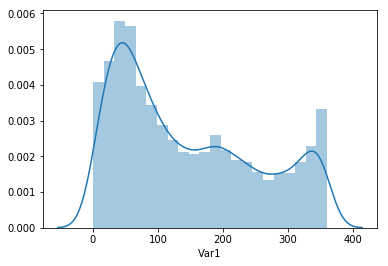

In [196]:
sns.distplot(df['Var1'])

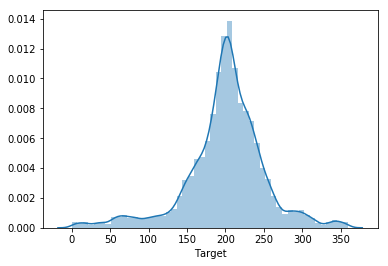

In [197]:
sns.distplot(df['Target'])

Average value of Target variable is between 150 to 250

## Scaling and Train Test Split

In [198]:
X = df.drop('Target',axis=1)
y = df['Target']

In [199]:
from sklearn.model_selection import train_test_split

In [200]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=101)

### Scaling

In [201]:
from sklearn.preprocessing import MinMaxScaler

In [202]:
scaler = MinMaxScaler()

In [203]:
X_train= scaler.fit_transform(X_train)

In [204]:
X_test = scaler.transform(X_test)

In [205]:
X_train.shape 

(6999, 8)

In [206]:
X_test.shape

(3000, 8)

## Creating a Model using rmsprop optimizer - Day 3

In [207]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

### Model - as a list of layers

In [208]:
model = Sequential([
    Dense(units=2),
    Dense(units=2),
    Dense(units=2)
])

### Model - adding in layers one by one

In [209]:
model = Sequential()

model.add(Dense(2))
model.add(Dense(2))
model.add(Dense(2))

In [210]:
model = Sequential()

model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))

# Final output node for prediction; Since it should give final o/p therefore layer is 1
model.add(Dense(1)) 

model.compile(optimizer='rmsprop',loss='mse')

In [211]:
y_train

803     234.09
1387    225.37
921     244.95
5917    228.50
8576    233.54
6225    228.64
6167     64.97
3628    191.35
1199    139.85
6506    244.92
8449    162.23
3674    215.30
2277    217.26
259     276.37
6812    259.35
1451    174.62
1613    259.15
2990    213.46
8240    196.66
1389    242.63
668     205.04
4853    203.49
5591    218.00
2209    268.29
7022    201.64
4283    301.36
1731    257.71
842     128.66
6087    172.15
8794    299.43
         ...  
3807    168.24
5758    192.47
2323    246.07
1273    139.40
9772    175.94
5538    174.82
2107    223.75
2931    149.93
1949    231.80
4467    200.68
9722    187.89
49      230.49
4573    341.48
9100    175.56
7173    184.96
3182    240.22
5824    210.63
6460    205.32
5032    220.40
2623    193.04
5764    214.75
5672    223.78
973     221.51
4079    152.48
6141    191.13
599     196.90
5695    114.70
8006    236.80
1361    297.83
1547    199.92
Name: Target, Length: 6999, dtype: float64

In [212]:
model.fit(X_train,y_train.values,epochs=250)

Epoch 1/250
6999/6999 [==============================] - 1s 134us/step - loss: 41662.9705
Epoch 2/250
6999/6999 [==============================] - 1s 114us/step - loss: 38690.1866
Epoch 3/250
6999/6999 [==============================] - 1s 76us/step - loss: 32157.6010
Epoch 4/250
6999/6999 [==============================] - 1s 74us/step - loss: 21616.5124
Epoch 5/250
6999/6999 [==============================] - 1s 95us/step - loss: 9510.9212
Epoch 6/250
6999/6999 [==============================] - 1s 107us/step - loss: 3317.9902
Epoch 7/250
6999/6999 [==============================] - 1s 81us/step - loss: 2891.7776
Epoch 8/250
6999/6999 [==============================] - 1s 85us/step - loss: 2731.4957
Epoch 9/250
6999/6999 [==============================] - 1s 83us/step - loss: 2589.1305
Epoch 10/250
6999/6999 [==============================] - 1s 87us/step - loss: 2472.3931
Epoch 11/250
6999/6999 [==============================] - 1s 100us/step - loss: 2365.2743
Epoch 12/250
6999/6999

6999/6999 [==============================] - 0s 68us/step - loss: 1761.8294
Epoch 93/250
6999/6999 [==============================] - 1s 90us/step - loss: 1760.3495
Epoch 94/250
6999/6999 [==============================] - 1s 110us/step - loss: 1759.7241
Epoch 95/250
6999/6999 [==============================] - 1s 88us/step - loss: 1760.9560
Epoch 96/250
6999/6999 [==============================] - 1s 76us/step - loss: 1759.9441
Epoch 97/250
6999/6999 [==============================] - 1s 96us/step - loss: 1760.5392 0s - loss:
Epoch 98/250
6999/6999 [==============================] - 1s 86us/step - loss: 1760.9074
Epoch 99/250
6999/6999 [==============================] - 1s 77us/step - loss: 1760.1813
Epoch 100/250
6999/6999 [==============================] - 1s 87us/step - loss: 1759.6682
Epoch 101/250
6999/6999 [==============================] - 0s 67us/step - loss: 1760.1314
Epoch 102/250
6999/6999 [==============================] - 1s 85us/step - loss: 1758.8419
Epoch 103/250
6999/

6999/6999 [==============================] - 1s 98us/step - loss: 1757.0808
Epoch 182/250
6999/6999 [==============================] - 1s 95us/step - loss: 1756.5098
Epoch 183/250
6999/6999 [==============================] - 0s 69us/step - loss: 1756.9235
Epoch 184/250
6999/6999 [==============================] - 0s 70us/step - loss: 1756.1449
Epoch 185/250
6999/6999 [==============================] - 1s 123us/step - loss: 1756.85020s - l
Epoch 186/250
6999/6999 [==============================] - 1s 85us/step - loss: 1756.3791
Epoch 187/250
6999/6999 [==============================] - 1s 88us/step - loss: 1757.6956
Epoch 188/250
6999/6999 [==============================] - 1s 112us/step - loss: 1757.1683
Epoch 189/250
6999/6999 [==============================] - 1s 107us/step - loss: 1756.3083
Epoch 190/250
6999/6999 [==============================] - 1s 74us/step - loss: 1756.9022
Epoch 191/250
6999/6999 [==============================] - 1s 76us/step - loss: 1756.6358
Epoch 192/250
6

In [213]:
losses = pd.DataFrame(model.history.history)

# Evaluation on Test Data

https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics

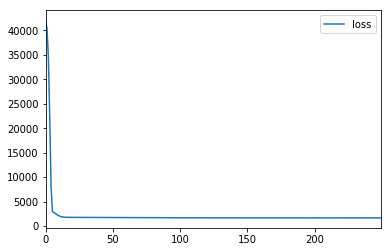

In [27]:
#Comparing loss on training data with val_loss i.e. loss on test data to check overfitting
losses.plot()

In [28]:
# Evaluates the model based on loss function specified (in our case, mse)
training_score = model.evaluate(X_train,y_train,verbose=0) #verbose - 0 since we dont want any o/p
test_score = model.evaluate(X_test,y_test,verbose=0) 

In [29]:
training_score

1664.5731296138706

In [30]:
test_score

1880.0716881510416

In [31]:
predictions = model.predict(X_test)

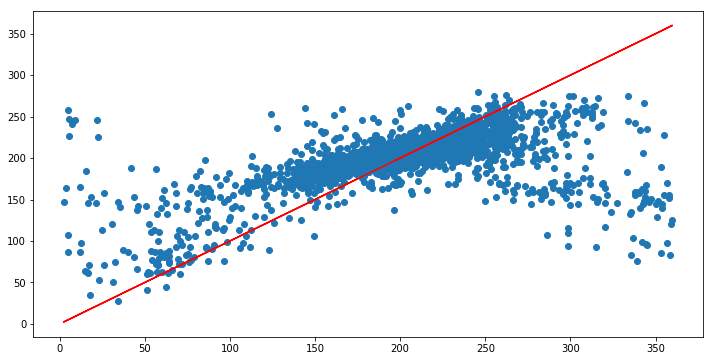

In [32]:
plt.figure(figsize=(12,6))
# Our predictions
plt.scatter(y_test,predictions)

# Perfect predictions
plt.plot(y_test,y_test,'r') #r is the red line or perfect prediction lines
#Outliers - really expensive houses

In [33]:
errors = y_test.values.reshape(3000, 1) - predictions

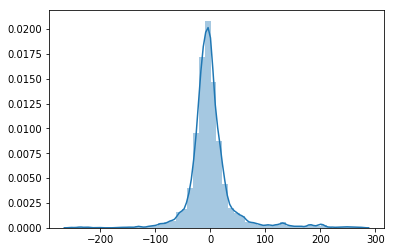

In [34]:
sns.distplot(errors)

## Creating a Model using adam optimizer - Day 4

In [35]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

In [36]:
model = Sequential()

model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

## Training the Model

In [37]:
model.fit(x=X_train,y=y_train.values,
          validation_data=(X_test,y_test.values),
          batch_size=128,epochs=400) #Larger a batch size will increase training time but will prevent overfitting of data

Train on 6999 samples, validate on 3000 samples
Epoch 1/400
6999/6999 [==============================] - 1s 92us/step - loss: 42130.0284 - val_loss: 42657.1140
Epoch 2/400
6999/6999 [==============================] - 0s 19us/step - loss: 37921.5016 - val_loss: 30010.5348
Epoch 3/400
6999/6999 [==============================] - 0s 20us/step - loss: 12350.6176 - val_loss: 3091.0775
Epoch 4/400
6999/6999 [==============================] - 0s 21us/step - loss: 2877.3566 - val_loss: 2833.9001
Epoch 5/400
6999/6999 [==============================] - 0s 21us/step - loss: 2684.7708 - val_loss: 2693.2097
Epoch 6/400
6999/6999 [==============================] - 0s 19us/step - loss: 2512.6465 - val_loss: 2519.5769
Epoch 7/400
6999/6999 [==============================] - 0s 21us/step - loss: 2324.3841 - val_loss: 2367.8687
Epoch 8/400
6999/6999 [==============================] - 0s 17us/step - loss: 2167.4242 - val_loss: 2249.2711
Epoch 9/400
6999/6999 [==============================] - 0s 20us/st

6999/6999 [==============================] - 0s 19us/step - loss: 1213.7573 - val_loss: 1417.9153
Epoch 75/400
6999/6999 [==============================] - 0s 20us/step - loss: 1205.9526 - val_loss: 1396.7058
Epoch 76/400
6999/6999 [==============================] - 0s 18us/step - loss: 1200.8730 - val_loss: 1386.8868
Epoch 77/400
6999/6999 [==============================] - 0s 17us/step - loss: 1196.4325 - val_loss: 1384.4895
Epoch 78/400
6999/6999 [==============================] - 0s 18us/step - loss: 1188.9306 - val_loss: 1375.7258
Epoch 79/400
6999/6999 [==============================] - 0s 18us/step - loss: 1181.4633 - val_loss: 1380.7633
Epoch 80/400
6999/6999 [==============================] - 0s 19us/step - loss: 1187.7531 - val_loss: 1369.5660
Epoch 81/400
6999/6999 [==============================] - 0s 20us/step - loss: 1177.1233 - val_loss: 1358.8788
Epoch 82/400
6999/6999 [==============================] - 0s 18us/step - loss: 1177.9681 - val_loss: 1361.4435
Epoch 83/400
6

6999/6999 [==============================] - 0s 18us/step - loss: 975.7611 - val_loss: 1116.0921
Epoch 148/400
6999/6999 [==============================] - 0s 17us/step - loss: 973.7025 - val_loss: 1123.8698
Epoch 149/400
6999/6999 [==============================] - 0s 17us/step - loss: 973.3691 - val_loss: 1116.3910
Epoch 150/400
6999/6999 [==============================] - 0s 20us/step - loss: 971.1586 - val_loss: 1124.6384
Epoch 151/400
6999/6999 [==============================] - 0s 17us/step - loss: 970.4239 - val_loss: 1124.9687
Epoch 152/400
6999/6999 [==============================] - 0s 18us/step - loss: 968.4800 - val_loss: 1131.1559
Epoch 153/400
6999/6999 [==============================] - 0s 19us/step - loss: 966.6725 - val_loss: 1112.9536
Epoch 154/400
6999/6999 [==============================] - 0s 19us/step - loss: 968.7746 - val_loss: 1120.2319
Epoch 155/400
6999/6999 [==============================] - 0s 19us/step - loss: 967.4200 - val_loss: 1120.2430
Epoch 156/400
6

Epoch 221/400
6999/6999 [==============================] - 0s 21us/step - loss: 873.2480 - val_loss: 1053.3959
Epoch 222/400
6999/6999 [==============================] - 0s 19us/step - loss: 872.0200 - val_loss: 989.3986
Epoch 223/400
6999/6999 [==============================] - 0s 19us/step - loss: 869.5732 - val_loss: 991.9369
Epoch 224/400
6999/6999 [==============================] - 0s 18us/step - loss: 867.4464 - val_loss: 999.9084
Epoch 225/400
6999/6999 [==============================] - 0s 18us/step - loss: 866.7984 - val_loss: 1000.2674
Epoch 226/400
6999/6999 [==============================] - 0s 17us/step - loss: 869.6357 - val_loss: 978.9113
Epoch 227/400
6999/6999 [==============================] - 0s 17us/step - loss: 864.8390 - val_loss: 992.5050
Epoch 228/400
6999/6999 [==============================] - 0s 17us/step - loss: 865.5648 - val_loss: 1025.2502
Epoch 229/400
6999/6999 [==============================] - 0s 17us/step - loss: 869.3509 - val_loss: 988.5727
Epoch 2

6999/6999 [==============================] - 0s 18us/step - loss: 795.6731 - val_loss: 916.8758
Epoch 296/400
6999/6999 [==============================] - 0s 17us/step - loss: 790.7000 - val_loss: 904.1566
Epoch 297/400
6999/6999 [==============================] - 0s 18us/step - loss: 795.2216 - val_loss: 907.3509
Epoch 298/400
6999/6999 [==============================] - 0s 19us/step - loss: 797.9880 - val_loss: 895.2374
Epoch 299/400
6999/6999 [==============================] - 0s 19us/step - loss: 792.8462 - val_loss: 901.6377
Epoch 300/400
6999/6999 [==============================] - 0s 26us/step - loss: 790.2216 - val_loss: 870.8270
Epoch 301/400
6999/6999 [==============================] - 0s 21us/step - loss: 787.2667 - val_loss: 882.4112
Epoch 302/400
6999/6999 [==============================] - 0s 18us/step - loss: 790.1582 - val_loss: 900.3448
Epoch 303/400
6999/6999 [==============================] - 0s 18us/step - loss: 786.8049 - val_loss: 883.1872
Epoch 304/400
6999/6999 

6999/6999 [==============================] - 0s 27us/step - loss: 724.2538 - val_loss: 802.3984
Epoch 370/400
6999/6999 [==============================] - 0s 19us/step - loss: 720.4876 - val_loss: 822.4387
Epoch 371/400
6999/6999 [==============================] - 0s 32us/step - loss: 720.9213 - val_loss: 841.5003
Epoch 372/400
6999/6999 [==============================] - 0s 21us/step - loss: 722.7778 - val_loss: 817.4937
Epoch 373/400
6999/6999 [==============================] - 0s 18us/step - loss: 721.8895 - val_loss: 831.2931
Epoch 374/400
6999/6999 [==============================] - 0s 41us/step - loss: 718.5831 - val_loss: 816.5829
Epoch 375/400
6999/6999 [==============================] - 0s 32us/step - loss: 723.3422 - val_loss: 817.5561
Epoch 376/400
6999/6999 [==============================] - 0s 28us/step - loss: 717.9072 - val_loss: 823.0182
Epoch 377/400
6999/6999 [==============================] - 0s 25us/step - loss: 707.9590 - val_loss: 824.5472
Epoch 378/400
6999/6999 

In [38]:
losses = pd.DataFrame(model.history.history)

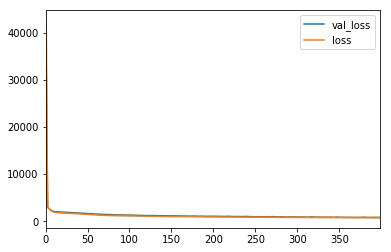

In [39]:
#Comparing loss on training data with val_loss i.e. loss on test data to check overfitting
losses.plot()

# Evaluation on Test Data

https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics

In [40]:
# Evaluates the model based on loss function specified (in our case, mse)
training_score = model.evaluate(X_train,y_train,verbose=0) #verbose - 0 since we dont want any o/p
test_score = model.evaluate(X_test,y_test,verbose=0) 

In [41]:
training_score

695.7539342604189

In [42]:
test_score

803.412183400472

In [43]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score

In [45]:
pd.DataFrame(y_test)

,Target
6676,197.43
6421,308.53
9968,185.48
8491,189.02
9981,224.93
8843,189.92
6798,169.25
5862,199.62
3662,187.27
3457,250.10


In [46]:
predictions = model.predict(X_test)

In [47]:
mean_absolute_error(y_test,predictions)

13.79199026451111

In [48]:
np.sqrt(mean_squared_error(y_test,predictions))

28.34452644382652

In [49]:
explained_variance_score(y_test,predictions)

0.698068173415394

In [50]:
df['Target'].mean()

199.8441784178418

In [51]:
df['Target'].median()

202.94

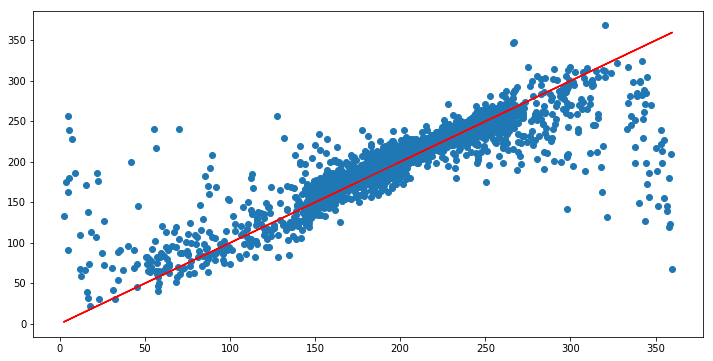

In [52]:
plt.figure(figsize=(12,6))
# Our predictions
plt.scatter(y_test,predictions)

# Perfect predictions
plt.plot(y_test,y_test,'r') #r is the red line or perfect prediction lines
#Outliers - really expensive houses

In [53]:
errors = y_test.values.reshape(3000, 1) - predictions

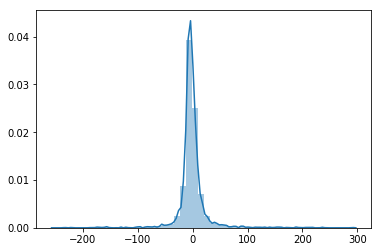

In [54]:
sns.distplot(errors)

In [55]:
df.dropna()

,Var1,Var2,Var3,Var4,Var5,Var6,Var7,Var8,Target
0,343.330,0.430,215.62,9.19,226.58,2.89,16.58,2.25,250.66
1,324.290,0.130,241.64,6.70,221.23,1.27,14.45,7.00,238.55
2,7.380,0.050,196.16,11.37,222.64,1.58,13.90,7.00,209.16
3,26.420,0.040,256.10,5.90,226.77,0.74,12.44,3.33,250.92
4,65.500,0.400,222.62,6.41,224.75,1.91,14.77,1.94,176.32
5,169.710,0.140,167.88,9.10,196.08,1.83,16.13,5.42,181.76
6,63.500,0.020,256.57,5.41,229.88,1.53,12.33,1.00,244.59
7,108.590,0.120,149.55,3.27,222.31,1.14,13.86,3.08,171.38
8,37.440,0.240,211.23,3.16,216.89,1.52,13.54,1.29,189.64
9,80.530,0.210,231.52,9.68,223.89,1.78,14.20,2.84,218.14


In [59]:
single_item = df.drop('Target',axis=1).iloc[0]

In [60]:
single_item = scaler.transform(single_item.values.reshape(-1, 8))

In [61]:
single_item

array([[0.95532033, 0.62264151, 0.59893197, 0.58210863, 0.62980876,
        0.54230769, 0.57453259, 0.20833333]])

In [62]:
model.predict(single_item)

array([[244.99619]], dtype=float32)

In [63]:
df.iloc[0]

Var1      343.33
Var2        0.43
Var3      215.62
Var4        9.19
Var5      226.58
Var6        2.89
Var7       16.58
Var8        2.25
Target    250.66
Name: 0, dtype: float64

In [64]:
single_item = df.drop('Target',axis=1).iloc[1]

In [65]:
single_item = scaler.transform(single_item.values.reshape(-1, 8))

In [66]:
single_item

array([[0.90228412, 0.18722787, 0.67130222, 0.42300319, 0.61493774,
        0.23076923, 0.46690248, 1.        ]])

In [67]:
model.predict(single_item)

array([[246.76848]], dtype=float32)

In [68]:
df[['Var1','Target']].corr()

,Var1,Target
Var1,1.000000,0.097871
Target,0.097871,1.000000


In [69]:
df[['Var2','Target']].corr()

,Var2,Target
Var2,1.000000,-0.155332
Target,-0.155332,1.000000


In [70]:
df[['Var3','Target']].corr()

,Var3,Target
Var3,1.00000,0.50679
Target,0.50679,1.00000


In [71]:
df[['Var4','Target']].corr()

,Var4,Target
Var4,1.000000,-0.105254
Target,-0.105254,1.000000


In [72]:
df[['Var5','Target']].corr()

,Var5,Target
Var5,1.000000,0.337731
Target,0.337731,1.000000


In [73]:
df[['Var6','Target']].corr()

,Var6,Target
Var6,1.000000,0.033673
Target,0.033673,1.000000


In [74]:
df[['Var7','Target']].corr()

,Var7,Target
Var7,1.000000,-0.070577
Target,-0.070577,1.000000


In [75]:
df[['Var8','Target']].corr()

,Var8,Target
Var8,1.000000,-0.054418
Target,-0.054418,1.000000


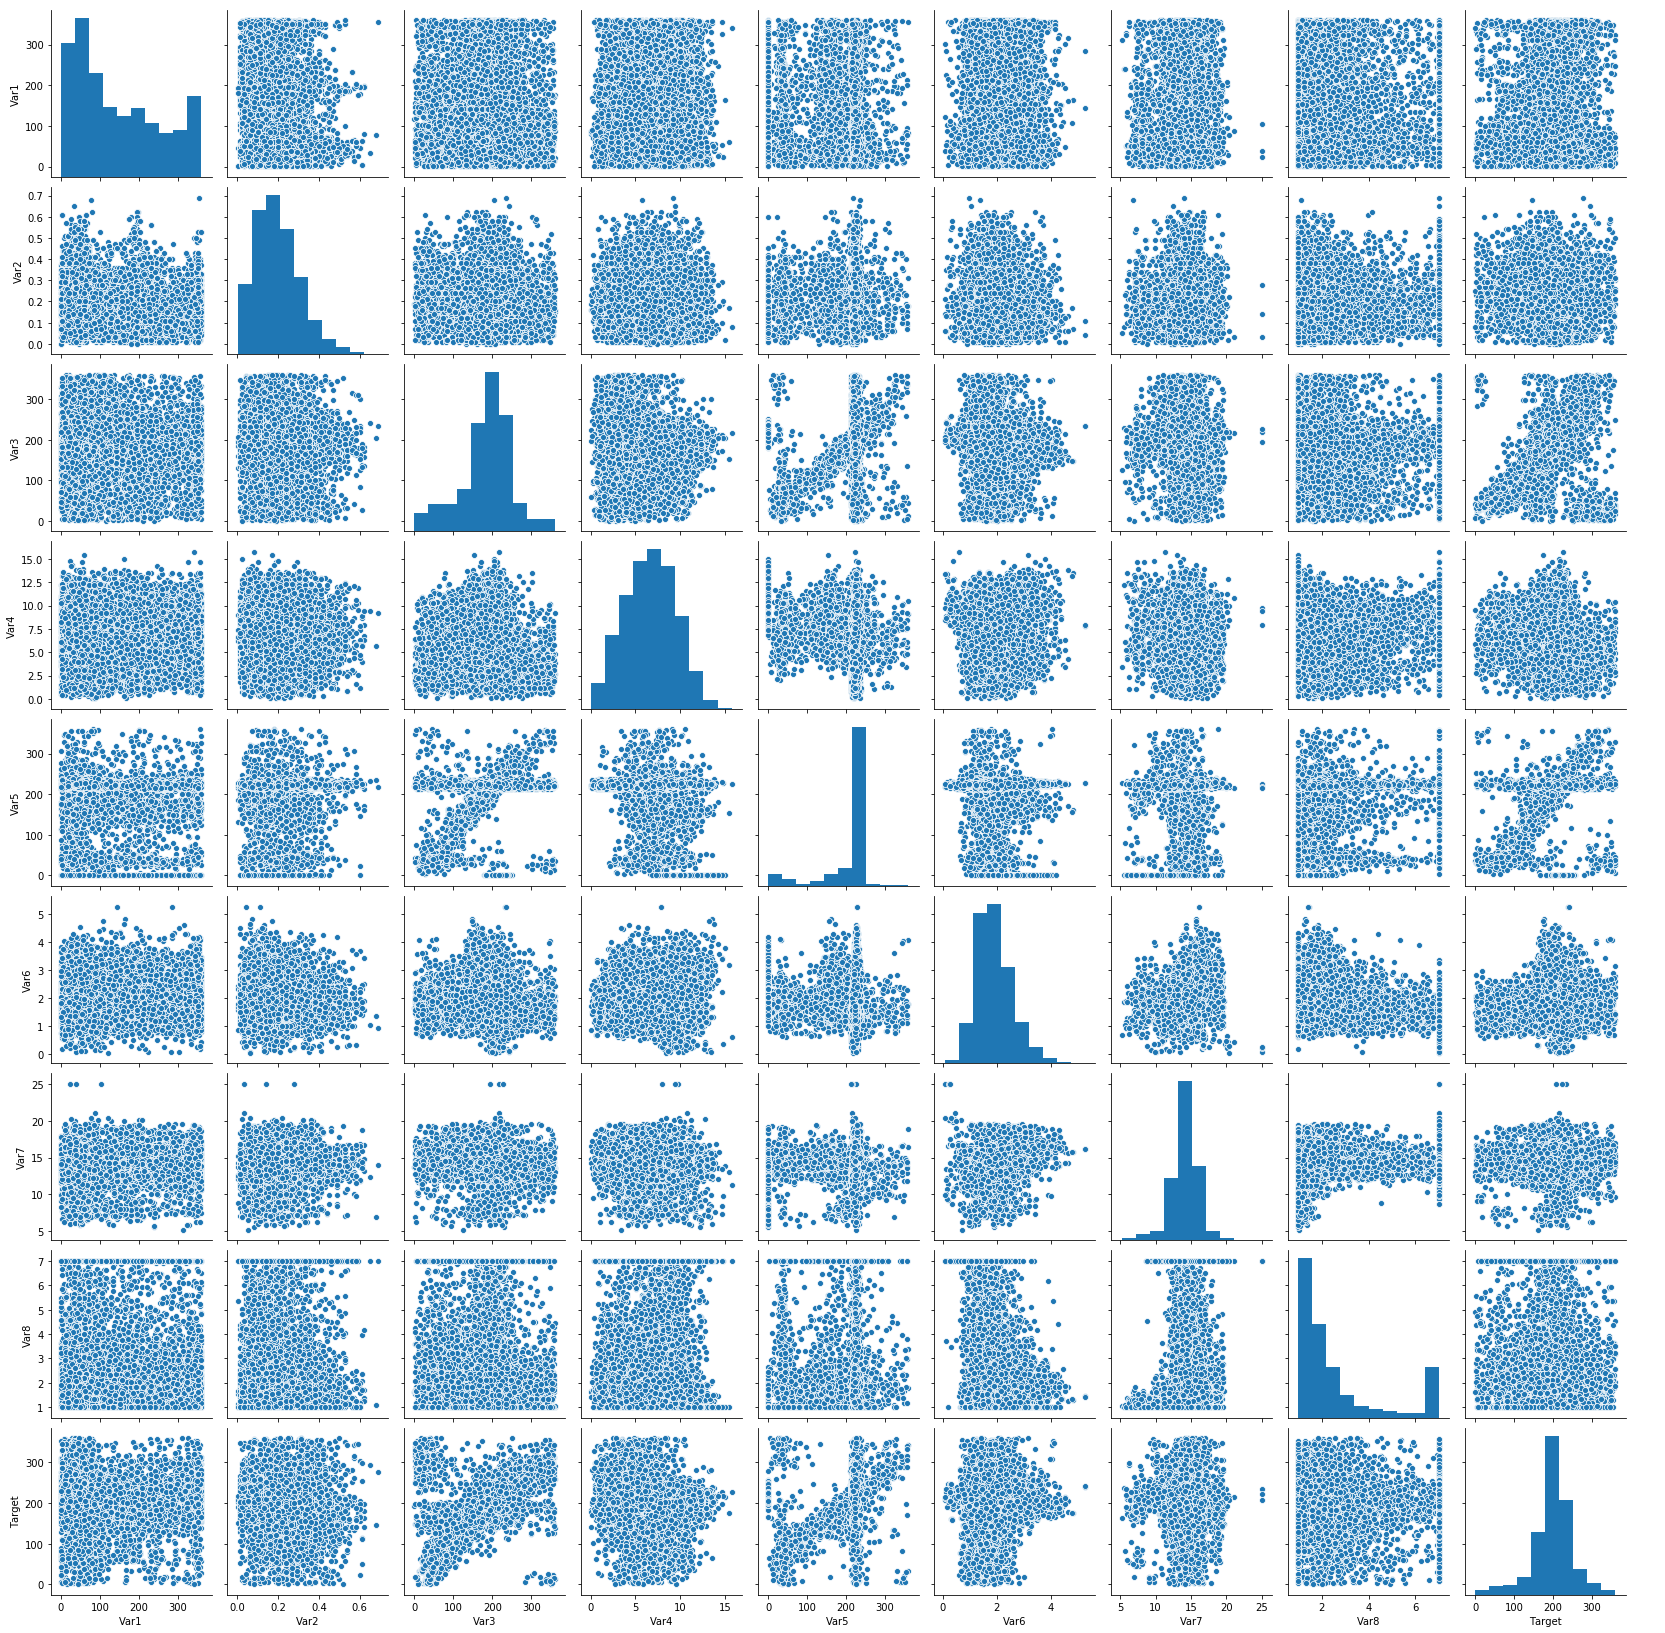

In [77]:
sns.pairplot(df)

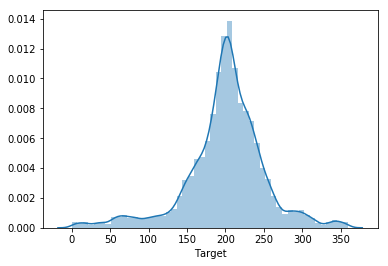

In [78]:
sns.distplot(df['Target'])

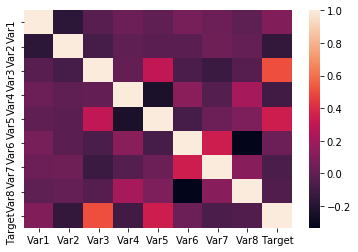

In [79]:
sns.heatmap(df.corr())

## Training a Linear Regression Model - Day 2

Let's now begin to train out regression model! We will need to first split up our data into an X array that contains the features to train on, and a y array with the target variable, in this case the Target column. 

### X and y arrays

In [80]:
X = df[['Var1', 'Var2', 'Var3', 'Var4', 'Var5', 'Var6', 'Var7', 'Var8']]
y = df['Target'].values
y


array([250.66, 238.55, 209.16, ..., 188.16, 163.13, 171.12])

## Train Test Split

Now let's split the data into a training set and a testing set. We will train out model on the training set and then use the test set to evaluate the model.

In [81]:
from sklearn.model_selection import train_test_split

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

## Creating and Training the Model

In [180]:
from sklearn.linear_model import LinearRegression

In [181]:
lm = LinearRegression()

In [182]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [183]:
predictions = lm.predict(X_test)

## Model Evaluation

Let's evaluate the model by checking out it's coefficients and how we can interpret them.

In [86]:
# print the intercept
print(lm.intercept_)

111.16188774990374


In [88]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Var1,0.044918
Var2,-42.912788
Var3,0.376688
Var4,-1.662547
Var5,0.161340
Var6,8.637083
Var7,-1.235139
Var8,0.161256


## Predictions from our Model

Let's grab predictions off our test set and see how well it did!

In [94]:
predictions = lm.predict(X_test)

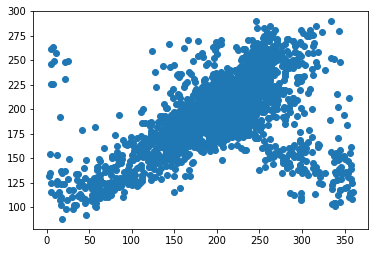

In [95]:
plt.scatter(y_test,predictions)

**Residual Histogram**

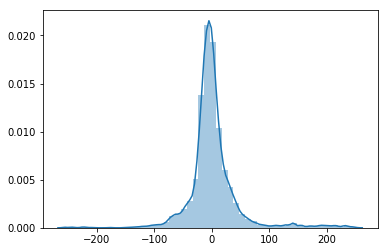

In [96]:
sns.distplot((y_test-predictions),bins=50);

In [97]:
from sklearn import metrics

In [98]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 25.128272175066808
MSE: 1904.0632998682433
RMSE: 43.63557378869039


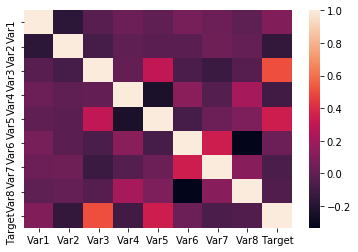

In [99]:
sns.heatmap(df.corr())

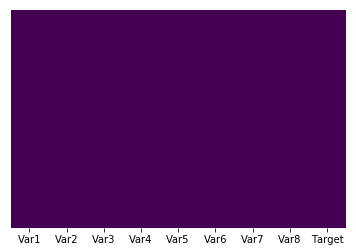

In [100]:
sns.heatmap(df.uisnll(),yticklabels=False,cbar=False,cmap='viridis')

In [101]:
len(predictions)

4000

In [102]:
from sklearn.metrics import r2_score
sklearn.metrics.r2_score(y_test, predictions)

0.2731670737845331

### Exploratory Data Analysis

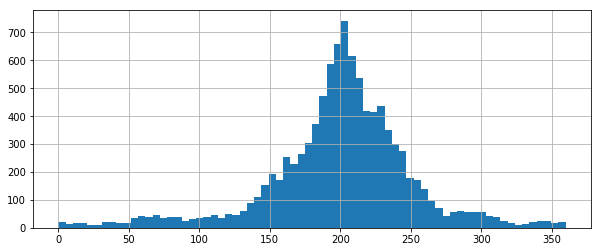

In [107]:
plt.figure(figsize=(10,4))
df['Target'].hist(bins=70)

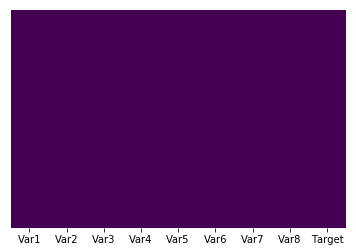

In [108]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

### K Means - Day 5

In [121]:
from sklearn.cluster import KMeans

In [122]:
kmeans = KMeans(n_clusters = 4) #since we specified in the dataset 4 centers

In [124]:
kmeans_predictions = kmeans.fit_predict(df[['Var1', 'Var2', 'Var3', 'Var4', 'Var5', 'Var6', 'Var7', 'Var8']])

In [128]:
kmeans_predictions

array([1, 1, 0, ..., 1, 3, 1], dtype=int32)

In [129]:
from sklearn.metrics import r2_score
sklearn.metrics.r2_score(y, kmeans_predictions)

-14.59910045171459

In [137]:
kmeans.labels_

array([1, 1, 0, ..., 1, 3, 1], dtype=int32)

In [138]:
from sklearn.metrics import classification_report,confusion_matrix

In [139]:
y

0       250.66
1       238.55
2       209.16
3       250.92
4       176.32
5       181.76
6       244.59
7       171.38
8       189.64
9       218.14
10      209.38
11      179.77
12      235.48
13      238.75
14      239.07
15      195.18
16      263.41
17       74.63
18      187.99
19      222.88
20      198.46
21      107.38
22      260.48
23      243.61
24      185.81
25      159.40
26      218.00
27      192.17
28      287.16
29      345.01
         ...  
9969    209.34
9970     51.32
9971    222.83
9972    238.65
9973    242.95
9974     41.36
9975    229.20
9976    178.86
9977    192.34
9978    241.09
9979    197.41
9980    204.26
9981    224.93
9982    205.04
9983    191.84
9984     39.76
9985    202.30
9986    225.06
9987    259.17
9988    145.65
9989    230.36
9990    154.62
9991    209.71
9992    200.55
9993    113.67
9994    167.44
9995    191.44
9996    188.16
9997    163.13
9998    171.12
Name: Target, Length: 9999, dtype: float64

In [140]:
kmeans_predictions = pd.Series(kmeans_predictions,dtype = 'float64')

In [141]:
kmeans_predictions.dtype

dtype('float64')

In [162]:
from sklearn.preprocessing import StandardScaler

In [163]:
scaler = StandardScaler()

In [164]:
scaler.fit(X_train,y_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [214]:
scaled_data = scaler.transform(X_test) #Apply the rotation in dimensionality reduction

### Principal Component Analysis - Day 6

In [166]:
#PCA
from sklearn.decomposition import PCA

In [167]:
pca = PCA(n_components = 2)

In [168]:
pca.fit(scaled_data)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [169]:
x_pca = pca.transform(scaled_data)

In [170]:
scaled_data.shape

(3000, 8)

In [171]:
x_pca.shape

(3000, 2)

Text(0, 0.5, 'Second Principal Component')

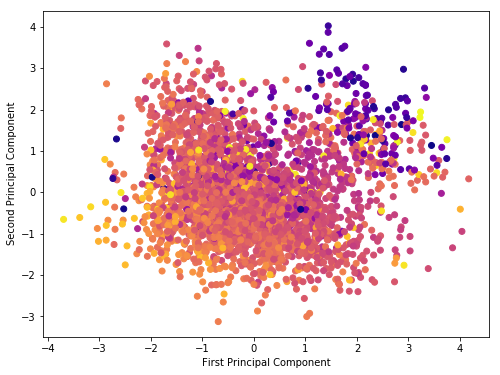

In [172]:
plt.figure(figsize = (8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=y_test,cmap = 'plasma')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

Dimensionality Reduction : We are doing with 2 columns of data instead of 8 columns of data

In [173]:
pca.components_

array([[ 0.14000181,  0.04997144, -0.39232886,  0.29845329, -0.52432416,
         0.55201751,  0.33633921, -0.20528719],
       [-0.26010306,  0.31419823, -0.24394422,  0.39833279, -0.39970736,
        -0.416987  , -0.22039326,  0.48293971]])

Each row represent a principal component and each column relates back to features

In [174]:
df_comp = pd.DataFrame(pca.components_,columns = df.columns[:8])

In [175]:
df_comp

,Var1,Var2,Var3,Var4,Var5,Var6,Var7,Var8
0,0.140002,0.049971,-0.392329,0.298453,-0.524324,0.552018,0.336339,-0.205287
1,-0.260103,0.314198,-0.243944,0.398333,-0.399707,-0.416987,-0.220393,0.482940


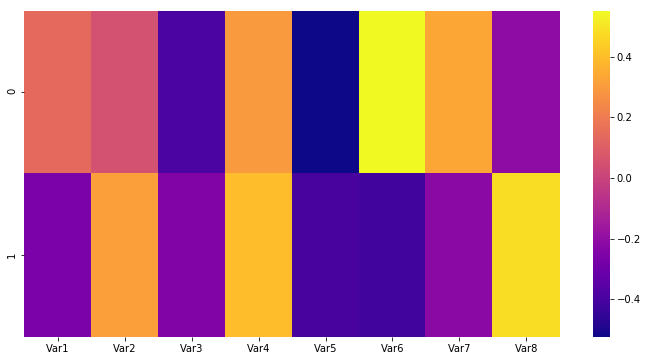

In [176]:
plt.figure(figsize=(12,6))
sns.heatmap(df_comp,cmap='plasma')

Each principal component here is shown as a row and the higher the number (or hotter the color) it is more correlated to specific feature in the column